In [1]:
#%%appyter init
from appyter import magic
magic.init(lambda _=globals: _())


In [2]:
# Inputs
%%appyter code_exec

gene_datasets = {{ MultiChoiceField(
    name='gene_datasets',
    label='Gene Set Selection',
    hint='Gene Sets to Compare',
    description='The selected gene sets will be compared and used to create a Venn Diagram',
    default=[
        'A_Geneshot_PainGenes_GeneRIF_AssociatedGenes.tsv',
        'B_Geneshot_PainGenes_AutoRIF_AssociatedGenes.tsv',
        ],
    choices=[
        'A_Geneshot_PainGenes_GeneRIF_AssociatedGenes.tsv',
        'B_Geneshot_PainGenes_AutoRIF_AssociatedGenes.tsv',
    ]
)}}
gene_datasets

#gene_datasets = ['A_Geneshot_PainGenes_GeneRIF_AssociatedGenes.tsv','B_Geneshot_PainGenes_AutoRIF_AssociatedGenes.tsv']
#gene_datasets

UsageError: Line magic function `%%appyter` not found.


In [3]:
#Importing Venn Diagram Libraries
## Will have to update this if want more than 3 sets
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

#Data Processing
import pandas as pd
import csv

%matplotlib inline
#Importing Venn Diagram Libraries
## Will have to update this if want more than 3 sets
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

#Data Processing
import pandas as pd
import csv

%matplotlib inline

In [4]:
%%appyter code_exec

# Reading in tsv files
tsv_file = open('A_Geneshot_PainGenes_GeneRIF_AssociatedGenes.tsv')
tsv_file2 = open('B_Geneshot_PainGenes_AutoRIF_AssociatedGenes.tsv')
tsv_file3 = open('C_Geneshot_PainGenes_GeneRIF_PredictedGenes_AutoRIF-CoOccurrence.tsv')

read_tsv = csv.reader(tsv_file, delimiter='\t')
read_tsv2 = csv.reader(tsv_file2, delimiter='\t')
read_tsv3 = csv.reader(tsv_file3, delimiter='\t')


```python
# Reading in tsv files
tsv_file = open('A_Geneshot_PainGenes_GeneRIF_AssociatedGenes.tsv')
tsv_file2 = open('B_Geneshot_PainGenes_AutoRIF_AssociatedGenes.tsv')
tsv_file3 = open('C_Geneshot_PainGenes_GeneRIF_PredictedGenes_AutoRIF-CoOccurrence.tsv')
read_tsv = csv.reader(tsv_file, delimiter='\t')
read_tsv2 = csv.reader(tsv_file2, delimiter='\t')
read_tsv3 = csv.reader(tsv_file3, delimiter='\t')
```

In [5]:
# Converting tsv files into lists
l1 = []
l2 = []
l3 = []

for row in read_tsv:
    l1.append(row[0])

for row in read_tsv2:
    l2.append(row[0])

for row in read_tsv3:
    l3.append(row[0])

# Converting the lists into sets
#s1 = set(l1)
#s2 = set(l2)
#s3 = set(l3)

tsv_file.close
tsv_file2.close
tsv_file3.close


<function TextIOWrapper.close()>

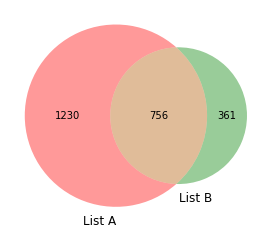

In [10]:
#Finds intersection between 2 lists
def two_intersection(l1, l2):
    return (set(l1) & set(l2))


# Creates a Venn Diagram given 2 lists
def make_2_venn_diagram(l1, l2):
    s1 = set(l1)
    s2 = set(l2)
    l1_only = s1-s2
    l2_only = s2-s1
    inter = two_intersection(l1, l2)
    l1_only_length = len(l1_only)
    l2_only_length = len(l2_only)
    inter_length = len(two_intersection(l1, l2))
    venn2(subsets = (l1_only_length, l2_only_length, inter_length), set_labels= ('List A', 'List B'))

make_2_venn_diagram(l1, l2)

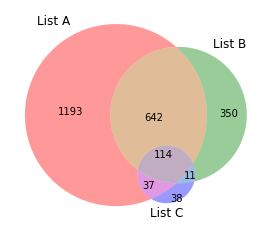

In [11]:
# Finds intersection between 3 lists
def intersection(l1, l2, l3):
    return (set(l1) & set(l2) & set(l3))

# Creates a venn diagram given 3 lists
def make_3_venn_diagram(l1, l2, l3):
    s1 = set(l1)
    s2 = set(l2)
    s3 = set(l3)

    l1_only = s1 - s2 - s3
    l2_only = s2 - s1 - s3
    l3_only = s3 - s1 - s2

    inter = intersection(l1, l2, l3)
    inter_l1_l2 = two_intersection(l1, l2)
    inter_l2_l3 = two_intersection(l2, l3)
    inter_l1_l3 = two_intersection(l1, l3)

    l1_only_length = len(l1_only)
    l2_only_length = len(l2_only)
    l3_only_length = len(l3_only)
    inter_length = len(inter)
    inter_l1_l2_len = len(inter_l1_l2) - inter_length
    inter_l2_l3_len = len(inter_l2_l3) - inter_length
    inter_l1_l3_len = len(inter_l1_l3) - inter_length

    venn3(subsets = (l1_only_length, l2_only_length, inter_l1_l2_len, l3_only_length, inter_l1_l3_len, inter_l2_l3_len, inter_length),set_labels= ('List A', 'List B', 'List C'))

make_3_venn_diagram(l1, l2, l3)